In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import dython as dy # for nominal categorical data
from dython.nominal import associations 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import os 
import taxi_survey 
from imp import reload
reload(taxi_survey)
from taxi_survey import *
from mord import LogisticIT
from mord import OrdinalRidge
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

In [2]:
df_raw = pd.read_excel("Electric Taxis in South Africa(1-5000).xlsx")
df_raw = df_raw.append(pd.read_excel('Electric Taxis in South Africa(5001-5703).xlsx'))
df = df_raw.copy()
df.dropna(subset=['Please select the option that applies to you:'], inplace=True)

df.drop(df.columns[0:7], axis = 1, inplace = True)
df = df[df['Please select the option that applies to you:'] != 'User of taxi service for transport']
driver_owner_user = df['Please select the option that applies to you:']



###### DROP RESPONDENTS WHO DID NOT SAY IF DRIVER OWNER OR USER ######



#### DEMOGRAPHICS ####
demographics = df.columns[0:6]
province_or_country = df[demographics[0]]
city_or_rural = df[demographics[1]]
which_area_now = df[demographics[2]]
language = df[demographics[3]]
age = df[demographics[4]]
gender = df[demographics[5]]

#### EDUCATION ####
education = df.columns[6:10]
highest_lvl_schooling = df[education[0]]
any_tertiary = df[education[1]]
any_education_after_school = df[education[2]]
highest_lvl_tertiary = df[education[3]]

#### DRIVER ####
driver_questions=  df.columns[11:22]
driver_how_long_driving = df[driver_questions[0]]
driver_how_many_days_per_week_driving = df[driver_questions[1]]
driver_what_days_drive = df[driver_questions[2]]
driver_hours_drive_per_weekday = df[driver_questions[3]]
driver_km_per_weekday = df[driver_questions[4]]
driver_hours_drive_per_weekend = df[driver_questions[5]]
driver_income_per_day = df[driver_questions[6]]
driver_knows_what_e_taxi_is = df[driver_questions[7]]
driver_e_taxi_benefit_vs_ICE = df[driver_questions[8]]
driver_e_taxi_risks_vs_ICE = df[driver_questions[9]]
driver_e_taxi_better_than_ICE = df[driver_questions[10]]

#### OWNER ####
owner_questions = df.columns[22:35]
owner_num_taxis = df[owner_questions[0]]
owner_how_long_owned_taxi = df[owner_questions[1]]
owner_petrol_or_diesel = df[owner_questions[2]]
owner_how_old_oldest_vehicle = df[owner_questions[3]]
owner_how_old_average_vehicle = df[owner_questions[4]]
owner_km_per_day = df[owner_questions[5]]
owner_income_per_week = df[owner_questions[6]]
owner_e_taxi_benefit_vs_ICE = df[owner_questions[7]]
owner_e_taxi_risks_vs_ICE = df[owner_questions[8]]
owner_e_taxi_better_than_ICE = df[owner_questions[9]]
owner_which_costs_more_to_run_ICE_or_etaxi = df[owner_questions[10]]
owner_which_costs_more_to_buy_ICE_or_etaxi = df[owner_questions[11]]
owner_which_costs_more_to_service_ICE_or_etaxi = df[owner_questions[12]]

#### OWNER/DRIVER ####
owner_driver_questions = df.columns[35:55]
owner_driver_num_taxis = df[owner_driver_questions[0]]
owner_driver_how_long_owned_taxi = df[owner_driver_questions[1]]
owner_driver_petrol_or_diesel = df[owner_driver_questions[2]]
owner_driver_how_old_oldest_vehicle = df[owner_driver_questions[3]]
owner_driver_how_old_average_vehicle = df[owner_driver_questions[4]]
owner_driver_how_far_per_day = df[owner_driver_questions[5]]
owner_driver_how_long_driven_taxi = df[owner_driver_questions[6]]
owner_driver_number_days_per_week = df[owner_driver_questions[7]]
owner_driver_what_days_drive = df[owner_driver_questions[8]]
owner_driver_hours_drive_per_weekday = df[owner_driver_questions[9]]
owner_driver_km_per_weekday_belief = df[owner_driver_questions[10]]
owner_driver_hours_drive_per_weekend = df[owner_driver_questions[11]]
owner_driver_income_per_week = df[owner_driver_questions[12]]
owner_driver_e_taxi_benefit_vs_ICE = df[owner_driver_questions[13]]
owner_driver_e_taxi_risks_vs_ICE = df[owner_driver_questions[14]]
owner_driver_e_taxi_better_than_ICE = df[owner_driver_questions[15]]
owner_driver_e_taxi_will_be_better_than_ICE = df[owner_driver_questions[16]]
owner_driver_which_costs_more_to_run_ICE_or_etaxi = df[owner_driver_questions[17]]
owner_driver_which_costs_more_to_buy_ICE_or_etaxi = df[owner_driver_questions[18]]
owner_driver_which_costs_more_to_service_ICE_or_etaxi = df[owner_driver_questions[19]]

#### USER ####
user_questions = df.columns[70:81]
user_how_long = user_questions[0]
user_how_many_days_per_week = user_questions[1]
user_what_days = user_questions[2]
user_how_far_normal_trip = user_questions[3]
user_avg_trip_cost = user_questions[4]
user_ICE_taxis_too_expensive = user_questions[5]
user_knows_what_e_taxi_is = user_questions[6]
user_e_taxi_benefit = user_questions[7]
user_e_taxi_risks = user_questions[8]
user_environmental_conscience = user_questions[9]
user_price_vs_time_prefs = user_questions[10]


#### PERCEPTIONS OF ICE TAXI ####
perceptions_of_ICE_taxi = df.columns[55:60]
ICE_taxi_safe = df[perceptions_of_ICE_taxi[0]]
ICE_taxi_reliable = df[perceptions_of_ICE_taxi[1]]
ICE_taxi_fuel_expensive = df[perceptions_of_ICE_taxi[2]]
ICE_taxi_purchase_expensive = df[perceptions_of_ICE_taxi[3]]
ICE_taxi_service_expensive = df[perceptions_of_ICE_taxi[4]]

#### PERCEPTIONS OF EV TAXI ####
perceptions_of_EV_taxi = df.columns[60:70]
EV_taxi_range = df[perceptions_of_EV_taxi[0]]
EV_taxi_charge_time = df[perceptions_of_EV_taxi[1]]
EV_taxi_purchase_decision = df[perceptions_of_EV_taxi[2]]
EV_taxi_purchase_price_threshold = df[perceptions_of_EV_taxi[3]]
EV_taxi_should_happen = df[perceptions_of_EV_taxi[4]]
EV_taxi_worried_about_stations = df[perceptions_of_EV_taxi[5]]
EV_taxi_affected_by_loadshedding = df[perceptions_of_EV_taxi[6]]
EV_taxi_charging_expensive = df[perceptions_of_EV_taxi[7]]
EV_taxi_purchase_expensive = df[perceptions_of_EV_taxi[8]]
EV_taxi_service_expensive = df[perceptions_of_EV_taxi[9]]

#### NEED FOR E-TAXI ####
need_for_etaxi = df.columns[81:83]
how_many_years_until_etaxi_available = df[need_for_etaxi[0]]
how_many_years_no_more_ICE_taxi = df[need_for_etaxi[1]]

#### CLIMATE CHANGE ####
climate_change = df.columns[84:89]
climate_concern = df[climate_change[0]]
climate_taxis_should_reduce_env_impact = df[climate_change[1]]
climate_ICE_taxis_harm_environment = df[climate_change[2]]
climate_EV_taxis_help_environment = df[climate_change[3]]
climate_govt_should_switch_to_ev = df[climate_change[4]]

#### PERSONAL CHARACTERISTICS ####
personal_characteristics = df.columns[89:92]
personal_risk_taker = df[personal_characteristics[0]]
peronsal_trust_people = df[personal_characteristics[1]]
personal_trust_tech = df[personal_characteristics[2]]

driver_perceptions = driver_questions[8:11]
print(driver_perceptions)
owner_perceptions = owner_questions[-6:]
print(owner_perceptions)
owner_driver_perceptions = owner_driver_questions[-7:]
print(owner_driver_perceptions)



Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)',
       'What risks would an electric taxi inroduce to your operations compared to petrol/diesel taxis? (select all that apply)',
       'Driving an electric taxi would be better for you than driving a petrol/diesel taxi'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)2',
       'What risks would an electric taxi inroduce to your operations compared to a petrol/diesel taxi? (select all that apply)',
       'Having an electric taxi would benefit your business.',
       'Which one would cost more to run the taxi per day?',
       'Which one would cost more to buy?',
       'Which one would have more service costs?'],
      dtype='object')
Index(['How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)3',
       'What risks would

In [221]:

driver-questions


Index(['How long have you been a taxi driver?',
       'How many days of the week do you drive a taxi',
       'What days do you drive a taxi',
       'On WEEKDAYS, how many hours do you drive a taxi per day?',
       'Per WEEKDAY, how many kilometres do you drive?',
       'On WEEKENDS, how many hours do you drive a taxi per day?',
       'What is your approximate average income per day? (in South African Rand)',
       'Do you know what an electric taxi is',
       'How do you expect an electric taxi will benefit you compared to petrol/diesel taxis? (select all that apply)',
       'What risks would an electric taxi inroduce to your operations compared to petrol/diesel taxis? (select all that apply)',
       'Driving an electric taxi would be better for you than driving a petrol/diesel taxi'],
      dtype='object')

In [ ]:
df[user_knows_what_e_taxi_is].value_counts(normalize =True)

My focuses for next chunk of analysis

In [ ]:
perceptions_of_EV_taxi, perceptions_of_ICE_taxi

Look at perceptions of EV taxi and perceptions of ICE taxi categories by driver, owner, user

Charging time: All of them seem to havea  fairly accuarte idea. Respondents who drive seem to think it will take longer <br>
In general, drivers seem to be more skeptical about electric taxis and owner/od's are more neutral about them


In [ ]:
pd.crosstab(driver_owner_user, climate_govt_should_switch_to_ev, normalize='index').plot(kind = 'bar', stacked = False)
plt.legend(title = 'Climate Concern', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
for perception in perceptions_of_ICE_taxi:
    print(perception)
    pd.crosstab(driver_owner_user, df[perception], normalize = 'index').plot(kind = 'bar', stacked = False)
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.show()

In [ ]:
#def plot_side_by_side(question1, question2):
    
for perception in perceptions_of_EV_taxi:
    print(perception)
    pd.crosstab(driver_owner_user, df[perception], normalize = 'index').plot(kind = 'bar', stacked = False)
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    plt.show()

In [ ]:
perceptions_of_EV_taxi, perceptions_of_ICE_taxi

## Stated preferences

### Would buy when available, and 'taxis should be made electric'

In [ ]:
order= [['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'I am not interested in buying any type of taxi'],
        ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']]

order_labels = [['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', 'Would not buy any taxi'], order[1]]

order_index = ['Drive a taxi', 'Drive and own a taxi', 'Own a taxi']
index = ['Driver',  'Owner-Driver' , 'Owner']
label = ['Would buy e-taxi', 'Taxis should be electric']
filename = ['would_buy_e_taxi', 'taxis_should_be_electric']
for idx, perception in enumerate(perceptions_of_EV_taxi[[2,4]]):
    pd.crosstab(driver_owner_user, df[perception], normalize='index')[order[idx]].reindex(order_index).plot(kind = 'bar', stacked = False)
    plt.xlabel(None)
    plt.ylabel("Normalised count", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = f'{label[idx]}', labels = order_labels[idx])
    plt.xticks(ticks = np.arange(len(index)), labels = index, rotation = 90, fontsize = 14)
    plt.tight_layout()
    plt.savefig(f"figures/{filename[idx]}.png")
    plt.show()

### Driving an electric taxi would be better

In [ ]:
driver_is_it_better = df[driver_questions[-1]].value_counts()
owner_is_it_better = df[owner_questions[-4]].value_counts()
owner_driver_is_it_better = df[owner_driver_questions[-4]].value_counts()

driver_is_it_better.index = driver_is_it_better.index.str.lower()
owner_is_it_better.index = owner_is_it_better.index.str.lower()
owner_driver_is_it_better.index = owner_driver_is_it_better.index.str.lower()

driver = driver_is_it_better
owner = owner_is_it_better
owner_driver = owner_driver_is_it_better

order_prefs = ['strongly agree', 'agree', 'neutral', 'disagree', 'strongly disagree', "don't know"]

# Creating dictionaries for plotting 
driver_prefs_dict = driver.reindex(order_prefs).to_dict()
owner_prefs_dict = owner.reindex(order_prefs).to_dict()
owner_driver_prefs_dict = owner_driver.reindex(order_prefs).to_dict()\
    
    
# Creating one dictionary for all the response values for the three different categories to loop over
prefs_dict = {"driver": [val/sum(list(driver_prefs_dict.values())) for val in list(driver_prefs_dict.values())], 
              'owner/driver': [val/sum(list(owner_driver_prefs_dict.values())) for val in list(owner_driver_prefs_dict.values())],
            "owner": [val/sum(list(owner_prefs_dict.values())) for val in list(owner_prefs_dict.values())]
            }


multiplier = 0
width = 0.2
x = np.arange(len(order_prefs))
fig, ax = plt.subplots(layout = 'constrained', figsize = (20, 8))

for respondent, response_counts in prefs_dict.items():
    offset= width * multiplier
    rects = ax.bar(x + offset, response_counts, width, label = respondent)
    multiplier += 1

axis_font_size = 14
ax.set_ylabel('Normalised count', fontsize = axis_font_size)
ax.set_xlabel('Perceptions of EV prefs', fontsize = axis_font_size)
ax.set_xticks(x + offset, labels= order_prefs, rotation = 90, fontsize = axis_font_size)
ax.legend()
plt.tight_layout()
plt.savefig('figures/dou_prefs_of_etaxi.png')
plt.show()



Factor analysis - who are the respondents who disagree with this?

In [ ]:
prefs_question_list = [driver_questions[-1], owner_questions[-4], owner_driver_questions[-4]]


### heat map???


order_driver = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree']
order_owner = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
# income, age, education, cliamte change, risk appetite,


# climate change - no discernable trend
df.groupby(driver_questions[-1]).mean(climate_change[0])[climate_change[0]] #suggests climate change is nahhhhhhhh
df.groupby(owner_questions[-4]).mean(climate_change[0])[climate_change[0]]
df.groupby(owner_driver_questions[-4]).mean(climate_change[0])[climate_change[0]]

# risk - appetite... possibly a slight trend actually as ewll 
#create risk index
df['risk_index'] = df[personal_characteristics[0]].map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})
df.groupby(driver_questions[-1]).mean('risk_index')['risk_index'].reindex(order_driver)
df.groupby(owner_questions[-4]).mean('risk_index')['risk_index'].reindex(order_owner)
df.groupby(owner_driver_questions[-4]).mean('risk_index')['risk_index'].reindex(order_owner)

# education .... (see figure in paper) - seems to be a trend for owners
# create education index 
df['education_index'] = df[education[0]].map({'No Schooling': 1, 'Grade 2 (previously Sub A / class 2)': 2, 'Grade 3 (Std. 1)': 3, 'Grade 4 (Std. 2)': 4,
                                                  'Grade 5 (Std. 3)': 5, 'Grade 6 (Std. 4)': 6, 'Grade 7 (Std. 5)': 7, 'Grade 8 (Std. 6 / Form 1)': 8,
                                                  'Grade 9 (Std. 7 / Form 2)': 9, 'Grade 10 (Std. 8 / Form 3)': 10, 'Grade 11 (Std. 9 / Form 4)': 11,
                                                 'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)': 12})
for question in prefs_question_list:
    if question == driver_questions[-1]:
        order = order_driver
    else:
        order = order_owner
    # print(df.groupby(question).mean('education_index')['education_index'].reindex(order))


# Age  - seems to be a trend for owners... 
# create age index
df['age_index'] = df[demographics[4]].map({'18 - 24': 21, '25 - 34': 30, '35 - 44': 40, '45 - 54': 50, '55 - 65': 60, '65+': 70})
for question in prefs_question_list:
    if question == driver_questions[-1]:
        order = order_driver
    else:
        order = order_owner
    #print(df.groupby(question).mean('age_index')['age_index'].reindex(order))


# Income - seems to actually show a clear trend.... but is there something else driving the income???
income_df_driver = df[df[driver_questions[6]] < 5000]
income_df_owner = df[df[owner_questions[6]] < 10000]
income_df_owner_driver = df[df[owner_driver_questions[12]] < 10000]
# create age index
for question in prefs_question_list:
    if question == driver_questions[-1]:
        order = order_driver
        this_df = income_df_driver
        income = driver_questions[6]
    elif question == owner_questions[-4]:
        order = order_owner
        this_df = income_df_owner
        income = owner_questions[6]
    else:
        order = order_owner
        this_df = income_df_owner_driver 
        income = owner_driver_questions[12]
    #print(this_df.groupby(question).mean(income)[income].reindex(order))
    
    
# Trust of technology - seems to be a trend for owners
#create index
df['tech_trust_index'] = df[personal_characteristics[1]].map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})
# print(df.groupby(driver_questions[-1]).mean('tech_trust_index')['tech_trust_index'].reindex(order_driver))
# print(df.groupby(owner_questions[-4]).mean('tech_trust_index')['tech_trust_index'].reindex(order_owner))
# print(df.groupby(owner_driver_questions[-4]).mean('tech_trust_index')['tech_trust_index'].reindex(order_owner), "\n")


# Trust of people - seems to be a slight trend for owners
#create index
df['tech_trust_index'] = df[personal_characteristics[0]].map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})
print(df.groupby(driver_questions[-1]).mean('tech_trust_index')['tech_trust_index'].reindex(order_driver))
print(df.groupby(owner_questions[-4]).mean('tech_trust_index')['tech_trust_index'].reindex(order_owner))
print(df.groupby(owner_driver_questions[-4]).mean('tech_trust_index')['tech_trust_index'].reindex(order_owner))


In [ ]:
df[personal_characteristics[2]].value_counts()

In [ ]:
df.groupby([ demographics[4], driver_questions[-1]]).size().reset_index(name = 'counts').plot(kind = 'bar',figsize = (20, 8))

## Cost perceptions

### Willingness to pay

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df['Option'] = df['Please select the option that applies to you:']
# Filter data by the condition that the value of perceptions_of_EV_taxi[3] is less than 0.1e7
df_wtp = df[df[perceptions_of_EV_taxi[3]] < 0.1e7]

# Create a figure and axis object for the plot
fig, ax = plt.subplots()

# Loop through the unique values in the 'Option' column of the filtered dataframe
for option in df_wtp['Option'].unique():
    # Subset the filtered dataframe to only include rows with the current 'Option' value
    subset_df = df_wtp[df_wtp['Option'] == option]
    # Plot a density curve for the subset of data
    subset_df[perceptions_of_EV_taxi[3]].plot(kind='density', ax=ax, label=option)

# Set the plot title and labels
plt.xlabel("Willingness to pay (R)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(labels = index)
plt.savefig("figures/dou_willingness_to_pay.png")
# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


Exploring where the second peak comes from
Tried and wrong <font color  = 'red'> "knows what taxi is and not" </font> <br>
Not tried yet <font color = 'yellow'> income </font>

Income

In [ ]:
plt.scatter(driver_income_per_day, df[perceptions_of_EV_taxi[3]])
plt.xlim(0,0.5e3)
plt.ylim(0, 0.1e6)

### Purchase, service, and operational cost (EV and ICE)

In [ ]:
order_cost = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', "Don't know"]
order_index = ['Drive a taxi', 'Drive and own a taxi', 'Own a taxi']
index = ['Driver',  'Owner-Driver' , 'Owner']

label = ['charging', 'purchasing', 'service']
for idx, perception in enumerate(perceptions_of_EV_taxi[-3:]):
    pd.crosstab(driver_owner_user, df[perception], normalize='index')[order_cost].reindex(order_index).plot(kind = 'bar', stacked = False)
    plt.xlabel(None)
    plt.ylabel("Normalised count", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = f'{label[idx]} EV is expensive')
    plt.xticks(ticks = np.arange(len(index)), labels = index, rotation = 90, fontsize = 14)
    plt.tight_layout()
    plt.savefig(f"figures/ev_{label[idx]}_cost_perceptions.png")
    plt.show()

In [ ]:
order_ICE_cost = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree']
order_index = ['Drive a taxi', 'Drive and own a taxi', 'Own a taxi']
index = ['Driver',  'Owner-Driver' , 'Owner']

label = ['fuel', 'purchase', 'service']
for idx, perception in enumerate(perceptions_of_ICE_taxi[-3:]):
    pd.crosstab(driver_owner_user, df[perception], normalize='index')[order_ICE_cost].reindex(order_index).plot(kind = 'bar', stacked = False)
    plt.xlabel(None)
    plt.ylabel("Normalised count", fontsize = 14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = f'{label[idx]} ICE is expensive')
    plt.xticks(ticks = np.arange(len(index)), labels = index, rotation = 90, fontsize = 14)
    plt.tight_layout()
    plt.savefig(f"figures/ICE_{label[idx]}_cost_perceptions.png")
    plt.show()

## Charging availability and time, range, and loadshedding concern

### Charging station availability

In [ ]:
order_availability = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', "Don't know"]
order_index = ['Drive a taxi', 'Drive and own a taxi', 'Own a taxi']
index = ['Driver',  'Owner-Driver' , 'Owner']

pd.crosstab(driver_owner_user, df[perceptions_of_EV_taxi[-5]], normalize='index')[order_availability].reindex(order_index).plot(kind = 'bar', stacked = False)
plt.xlabel(None)
plt.ylabel("Normalised count", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Charging Availability Is Concern')
plt.xticks(ticks = np.arange(len(index)), labels = index, rotation = 90, fontsize = 14)
plt.tight_layout()
plt.savefig("figures/dou_charging_availability_perceptions.png")
plt.show()

### Load shedding

In [ ]:
order_loadshedding = ['Strongly agree', 'Agree', 'Neutral', 'Disagree', 'Strongly disagree', "Don't know"]
order_index = ['Drive a taxi', 'Drive and own a taxi', 'Own a taxi']
index = ['Driver',  'Owner-Driver' , 'Owner']

pd.crosstab(driver_owner_user, df[perceptions_of_EV_taxi[-4]], normalize='index')[order_loadshedding].reindex(order_index).plot(kind = 'bar')
plt.xlabel(None)
plt.ylabel("Normalised count", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title = 'Loadshedding Concern')
plt.xticks(ticks = np.arange(len(index)), labels = index, rotation = 90, fontsize = 14)
plt.tight_layout()
plt.savefig("figures/dou_loadshedding_perception.png")
plt.show()

### Charging time

In [ ]:
order_charging_time = ['Less than 10minutes', '10 - 20minutes', '20 - 30minutes', '30minutes - 1hour', '1 - 2hours', '2 - 5hours', 'More than 5hours']
labels_charging_time = ['<10 min', '10 - 20min', '20 - 30min', '30min - 1h', '1 - 2h', '2 - 5h', '>5h']
order_index = ['Drive a taxi', 'Drive and own a taxi', 'Own a taxi']
index = ['Driver',  'Owner-Driver' , 'Owner']

pd.crosstab(driver_owner_user, df[perceptions_of_EV_taxi[1]], normalize='index')[order_charging_time].reindex(order_index).plot(kind = 'bar')
plt.xlabel(None)
plt.ylabel("Normalised count", fontsize = 14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', labels = labels_charging_time )
plt.xticks(ticks = np.arange(len(index)), labels = index, rotation = 90, fontsize = 14)
plt.tight_layout()
plt.savefig("figures/dou_charging_time_perception.png")
plt.show()

### Range

In [ ]:
order_range = ['Less than 50km', '50 - 100km', '101 - 150km', '151 - 200km', '201 - 250km', '251 - 300km', '301 - 350km', '351 - 400km', '401 - 450km', '451 - 500km', 'More than 500km']
order_index = ['Drive a taxi', 'Drive and own a taxi', 'Own a taxi']
index = ['Driver',  'Owner-Driver' , 'Owner']

pd.crosstab(driver_owner_user, df[perceptions_of_EV_taxi[0]], normalize='index')[order_range].reindex(order_index).plot(kind = 'bar')
plt.xlabel(None)
plt.ylabel("Normalised count", fontsize = 14)
plt.legend(title = 'KM driving', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks = np.arange(len(index)), labels = index, rotation = 90, fontsize = 14)
plt.tight_layout()
plt.savefig("figures/dou_range_perception.png")
plt.show()

## Need for EV section: "In how many years from now possbiel to buy e-taxi?" ; "How many years from now no longer possible to buy diesel or petrol?"

See how their edcuation on this affects their belief that the gov't should switch to e-taxi.... 

In [ ]:
pd.crosstab(driver_owner_user, climate_govt_should_switch_to_ev, normalize='index').plot(kind = 'bar', stacked = False)

# Multinomial Logit following https://reader.elsevier.com/reader/sd/pii/S0967070X2200350X?token=1BF225FEB358B564957893A010EFE5BAD4E4730294E574DB56FB46652EAB51B426DA5F6C204469622E90F2D4A64EC3A8&originRegion=eu-west-1&originCreation=20230315193750
List of variables:

<u> Socio-economic factors </u>
1. Gender [dummy], 1 = Male, 0 if female
2. Age [numeric]
3. Education [dummy], 1 if >= Grade 12, 0 if < Grade 12
4. Income [numeric]
5. City vs rural

<u> Respondent type </u>
1. Driver [dummy]
2. Owner-Driver [dummy]
3. Owner [dummy]

<u> EV perceptions </u>
1. How many years until EV taxi? [numeric]
2. How many years until ICE taxi no longer available [numeric]
3. E-taxi range [numeric]
4. E-taxi charge time [numeric]
5. Worried about stations [Likert item, numeric]
6. Affected by loadshedding [Likert item, numeric]
7. E-taxi charging expensive [Likert item, numeric]
8. E-taxi purchase expensive [Likert item, numeric]
9. E-taxi service expensive [Likert item, numeric]

<u> Environmental </u>
1. Climate change awareness [numeric]
2. Taxis will reduce environmental impact [Likert item, numeric]

<u> Personal attitudes </u>
1. Trusts technology [Likert item, numeric]
2. Trusts people [Likert item, numeric]
2. Risk tolerance [numeric]

'Per WEEKDAY, how many kilometres do you drive?2'

In [115]:

#### Start transforming the columns into what I need

### Current caveats: The 'perception of EV taxi variables' for charge time, range, and loadshedding concern currently do not contain the 'don't know' answer. it is effectively dropped.

#### Demographics ####

# Dummies
import numpy as np

df['gender_dummy'] = gender.apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else np.nan))
import numpy as np
df['education_dummy']= np.where(highest_lvl_schooling == 'Grade 12 (Std. 10 / Matric / Senior Certificate / Form 5)', 1, 0)
df['city_dummy'] = np.where(city_or_rural == 'City / Urban', 1,0)

# Numeric
df['age_index'] = df[demographics[4]].map({'18 - 24': 21, '25 - 34': 30, '35 - 44': 40, '45 - 54': 50, '55 - 65': 60, '65+': 70})

df['driver_dummy'] = np.where(driver_owner_user == 'Drive a taxi', 1, 0)
df['owner_driver_dummy'] = np.where(driver_owner_user == 'Drive and own a taxi', 1, 0)
df['owner_dummy'] = np.where(driver_owner_user == 'Own a taxi', 1, 0)

# Change NaN's to 0 so that the columns can be summed
driver_income_per_day = driver_income_per_day.fillna(0)
owner_income_per_week = owner_income_per_week.fillna(0)
owner_driver_income_per_week = owner_driver_income_per_week.fillna(0)
df['income'] = driver_income_per_day + owner_income_per_week + owner_driver_income_per_week


#### Perceptions of EV taxis ####

# Numeric
df['yrs_ICE_unavailable'] = how_many_years_no_more_ICE_taxi.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':13})

df['yrs_EV_available'] = how_many_years_until_etaxi_available.map({'1 to 3 years':2, '4 to 6 years':5, '7 to 9 years':8, '10 to 12 years':11, '12 years or more':13})

df['EV_range'] = EV_taxi_range.map({'Less than 50km': 25, '50 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '301 - 350km': 325, '351 - 400km': 375, '401 - 450km': 425, '451 - 500km': 475, 'More than 500km': 525})

df['EV_charge_time'] = EV_taxi_charge_time.map({'Less than 10minutes': 5, '10 - 20minutes': 15, '20 - 30minutes': 25, '30minutes - 1hour': 45, '1 - 2hours': 90, '2 - 5hours': 210, 'More than 5hours': 300})

# Likert item, numeric
# 5. Worried about stations [Likert item, numeric]
df['charge_availability_concern'] = EV_taxi_worried_about_stations.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})
# 6. Affected by loadshedding [Likert item, numeric]
df['loadshedding_concern'] = EV_taxi_affected_by_loadshedding.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})
# 7. E-taxi charging expensive [Likert item, numeric]
df['EV_charging_expensive'] = EV_taxi_charging_expensive.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})
# 8. E-taxi purchase expensive [Likert item, numeric]
df['EV_purchase_expensive'] = EV_taxi_purchase_expensive.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})
# 9. E-taxi service expensive [Likert item, numeric]
df['EV_service_expensive'] = EV_taxi_service_expensive.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3,  "Don't know": 3, 'Disagree': 2, 'Strongly disagree': 1})


#### Environmental ####
# 1. Climate change awareness [numeric]
df['climate_concern'] = climate_concern

# 2. Taxis will reduce environmental impact [Likert item, numeric]
df['taxis_should_reduce_env_impact'] = climate_taxis_should_reduce_env_impact.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})
 
#### Personal attitudes ####
#  Risk tolerance [Likert item, numeric]
df['risk_taker'] = personal_risk_taker.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})

# Trusts technology [Likert item, numeric]
df['trusts_tech'] = peronsal_trust_people.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})

# Trusts people [Likert item, numeric]
df['trust_people'] = personal_trust_tech.map({'Strongly agree': 5, 'Agree': 4, 'Neutral': 3, 'Disagree': 2, 'Strongly disagree': 1})




##### Daily distance traveled ##### 

# Map responses to integers -- first map the responses to the mean of the group
driver_daily_distance = df[driver_questions[4]].map({'0 - 50km': 25, '51 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '300km+': 300})
# Full mapping
driver_daily_distance = df[driver_questions[4]].map({'0 - 50km': 25, '51 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '300km+': 300, 
                                                   "Don't know": driver_daily_distance.mean()})

owner_daily_distance = df[owner_questions[5]].map({'0 - 50km': 25, '51 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '300km +': 300})
owner_daily_distance = df[owner_questions[5]].map({'0 - 50km': 25, '51 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '300km +': 300, 
                                                   "Don't know": owner_daily_distance.mean()})

owner_driver_daily_distance = df[owner_driver_questions[10]].map({'0 - 50km': 25, '51 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '300km+': 300})
owner_driver_daily_distance = df[owner_driver_questions[10]].map({'0 - 50km': 25, '51 - 100km': 75, '101 - 150km': 125, '151 - 200km': 175, '201 - 250km': 225, '251 - 300km': 275, '300km+': 300, 
                                                   "Don't know": owner_driver_daily_distance.mean()})
df['distance_perception'] = driver_daily_distance.fillna(owner_daily_distance).fillna(owner_driver_daily_distance)



#### Outcome variable
df['ev_purchase_intention'] = EV_taxi_purchase_decision


# define variables of interest
variables = [
    'EV_range',
    'EV_charge_time',
    'charge_availability_concern',
    'loadshedding_concern',
    'EV_charging_expensive',
    'EV_purchase_expensive',
    'EV_service_expensive',
    'climate_concern',
    'taxis_should_reduce_env_impact',
    'risk_taker',
    'trusts_tech',
    'trust_people',
    'yrs_ICE_unavailable',
    'yrs_EV_available',
    'age_index',
    'gender_dummy',
    'education_dummy',
    'city_dummy',
    'driver_dummy',
    'owner_driver_dummy',
    'distance_perception',
    'income'
]

# define target variable
target_var = 'ev_purchase_intention'



logit_df = df[variables + [target_var]].dropna()

logit_df[target_var] = logit_df[target_var].map({'Strongly agree': 1, 'Agree': 1, 'Neutral': 0, 'Disagree': 0, 'Strongly disagree': 0})
logit_df.dropna(inplace = True)

Multinomial logit model

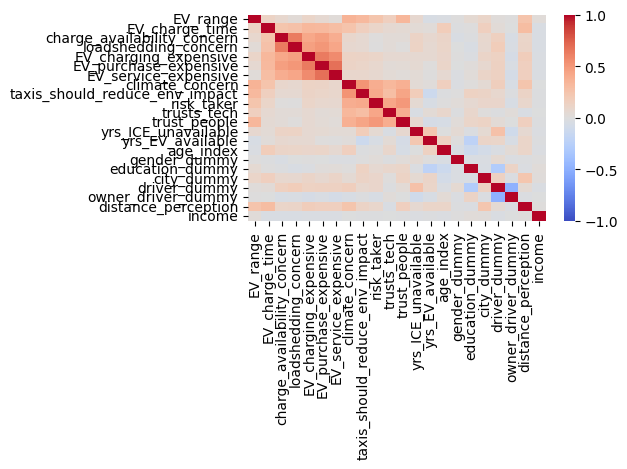

In [116]:
# plot correlaion matrix
import seaborn as sns

# compute correlation matrix
corr_matrix = logit_df[variables].corr()

# plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.savefig("figures/correlation_matrix_log_reg.png")
plt.tight_layout()
plt.show()


The Regression

In [117]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


 # Create design matrix X and target variable y
X = logit_df[variables]
y = logit_df[target_var]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up parameter grid for grid search
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Define the logistic regression model with L2 regularization
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

# Perform grid search to find the best alpha
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['C']

print("Best alpha:", best_alpha)

# Define the logistic regression model with the best alpha
logreg_best = LogisticRegression(penalty='l2', solver='lbfgs', C=best_alpha, max_iter=1000)
# Fit the model to the training data
logreg_best.fit(X,y)

# Make predictions on the test data
coefs = logreg_best.coef_

# Evaluate the model
print("Model coefficients:", coefs)



Best alpha: 10
Model coefficients: [[ 3.54533218e-03 -3.43321760e-03 -9.55482884e-05 -9.88826288e-05
  -8.90408101e-05 -9.41682808e-05 -9.79401353e-05 -1.94575658e-05
  -1.70051663e-05 -2.23618386e-05 -3.48318057e-05  2.43241551e-06
  -2.01369006e-04 -2.63085358e-04 -1.04105302e-03 -1.84628589e-05
  -8.07593846e-06  1.42254275e-05 -2.00822485e-05  9.21699595e-07
  -2.67597800e-03 -3.26002944e-08]]


In [118]:
# Create design matrix X and target variable y
X = logit_df[variables]
y = logit_df[target_var]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up parameter grid for grid search
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Define the logistic regression model with L2 regularization
logreg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)

# Perform grid search to find the best alpha
grid_search = GridSearchCV(logreg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['C']

print("Best alpha:", best_alpha)

# Define the logistic regression model with the best alpha
logreg_best = LogisticRegression(penalty='l2', solver='lbfgs', C=best_alpha, max_iter=1000)

# Fit the model to the training data
logreg_best.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = logreg_best.predict_proba(X_test)[:, 1]

# Add an intercept column to X
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X, C=1/best_alpha)
result = logit_model.fit()

# Create a table of regression coefficients, standard errors, z-scores, and p-values
table = pd.DataFrame({'coef': result.params,
                      'std err': result.bse,
                      'z': result.tvalues,
                      'P>|z|': result.pvalues})
table['Odds Ratio'] = np.exp(table['coef'].astype(float))
table['Odds Ratio'] = table['Odds Ratio'].apply(lambda x: "{:.3f}".format(x))
# Add asterisks for significance levels
table['P>|z|'] = table['P>|z|'].apply(lambda x: "{:.4f}".format(x))
table['coef'] = table['coef'].apply(lambda x: "{:.3f}".format(x))
table['std err'] = table['std err'].apply(lambda x: "{:.3f}".format(x))
table['z'] = table['z'].apply(lambda x: "{:.3f}".format(x))
table['P>|z|'] = table['P>|z|'].astype(float)
table['sig'] = ''
table.loc[table['P>|z|'] < 0.001, 'sig'] = '***'
table.loc[(table['P>|z|'] >= 0.001) & (table['P>|z|'] < 0.01), 'sig'] = '**'
table.loc[(table['P>|z|'] >= 0.01) & (table['P>|z|'] < 0.05), 'sig'] = '*'
table.loc[(table['P>|z|'] >= 0.05) & (table['P>|z|'] < 0.10), 'sig'] = '#'
table['coef'] = table['coef'].astype(float)

# Print the regression table
print(table[['coef', 'std err', 'z', 'P>|z|', 'sig', 'Odds Ratio']])


Best alpha: 10
Optimization terminated successfully.
         Current function value: 0.543114
         Iterations 10
                                 coef std err       z   P>|z|  sig Odds Ratio
const                           0.276   0.549   0.503  0.6152           1.318
EV_range                        0.003   0.000   9.042  0.0000  ***      1.003
EV_charge_time                 -0.001   0.000  -2.702  0.0069   **      0.999
charge_availability_concern    -0.128   0.058  -2.208  0.0273    *      0.879
loadshedding_concern           -0.073   0.060  -1.215  0.2245           0.929
EV_charging_expensive          -0.083   0.058  -1.429  0.1531           0.920
EV_purchase_expensive           0.001   0.072   0.015  0.9877           1.001
EV_service_expensive           -0.304   0.060  -5.039  0.0000  ***      0.738
climate_concern                 0.016   0.019   0.839  0.4012           1.016
taxis_should_reduce_env_impact  0.429   0.059   7.257  0.0000  ***      1.536
risk_taker              

/Users/Orie4416/.local/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['C']
  warnings.warn(msg, ValueWarning)


In [119]:
print(table[['sig', 'Odds Ratio']].to_latex())

\begin{tabular}{lll}
\toprule
{} &  sig & Odds Ratio \\
\midrule
const                          &      &      1.318 \\
EV\_range                       &  *** &      1.003 \\
EV\_charge\_time                 &   ** &      0.999 \\
charge\_availability\_concern    &    * &      0.879 \\
loadshedding\_concern           &      &      0.929 \\
EV\_charging\_expensive          &      &      0.920 \\
EV\_purchase\_expensive          &      &      1.001 \\
EV\_service\_expensive           &  *** &      0.738 \\
climate\_concern                &      &      1.016 \\
taxis\_should\_reduce\_env\_impact &  *** &      1.536 \\
risk\_taker                     &    \# &      1.085 \\
trusts\_tech                    &      &      0.972 \\
trust\_people                   &  *** &      1.654 \\
yrs\_ICE\_unavailable            &    \# &      0.979 \\
yrs\_EV\_available               &  *** &      0.954 \\
age\_index                      &  *** &      0.973 \\
gender\_dummy                   &      &    

In [182]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2



# create design matrix
X = logit_df[variables]
X = sm.add_constant(X)

# create target variable
y = logit_df[target_var]

# fit multinomial logistic regression model
multinom_model = sm.MNLogit(y, X, regularize = 'l2', alpha = 21.5)
multinom_results = multinom_model.fit()
# multinom_results_cov_params = multinom_results.cov_params().reset_index(level=0, drop=True)
# multinom_results_cov_params.columns = multinom_results.cov_params().columns.droplevel(0)

# # fit conditional logistic regression model
# condlogit_model = sm.Logit(y, X)
# condlogit_results = condlogit_model.fit_regularized()

# # compute difference in coefficients and standard errors
# diff_coef = multinom_results.params - condlogit_results.params

# # convert MultiIndex to regular index
# diff_se = np.sqrt(np.diag(multinom_results_cov_params - condlogit_results.cov_params()))
# diff_se = pd.Series(diff_se, index=diff_coef.index)  # reset index to match diff_coef

# # compute chi-square test statistic
# test_stat = np.dot(diff_coef, np.linalg.inv(np.diag(diff_se.values)).dot(diff_coef))
# p_value = chi2.sf(test_stat, df=diff_coef.shape[0])

# # print results
# print('Hausman-McFadden test statistic:', test_stat)
# print('P-value:', p_value)

# diff_coef = multinom_results.params - condlogit_results.params
# diff_se = np.sqrt(multinom_results.cov_params() - condlogit_results.cov_params()).diagonal()

# # compute chi-square test statistic
# test_stat = np.dot(diff_coef, np.linalg.inv(diff_se).dot(diff_coef))
# p_value = chi2.sf(test_stat, df=diff_coef.shape[0])

# # print results
# print('Hausman-McFadden test statistic:', test_stat)
# print('P-value:', p_value)


Optimization terminated successfully.
         Current function value: nan
         Iterations 7


/Users/Orie4416/.local/lib/python3.9/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['regularize', 'alpha']
  warnings.warn(msg, ValueWarning)
/Users/Orie4416/.local/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2299: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/Users/Orie4416/.local/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2300: RuntimeWarning: invalid value encountered in divide
  return eXB/eXB.sum(1)[:,None]
